# EEG User Authentication

This project aims to authenticate users based on their EEG readings using the XGBoost model. The dataset consists of EEG recordings from multiple users who were exposed to a 1:01 minute audio stimulus.

The dataset contains 14 columns representing different channels/sensors used to record the EEG signals from different regions of the brain. Each channel/sensor records the electrical activity of a specific region of the brain. Each row in the dataset represents an epoch of EEG data.

# Import the datasets

In [1]:
import os
import pandas as pd

# Set the directory path containing the CSV files
directory_path = r'C:\Users\Rahul Nagarajan\Desktop\Masters Project\Datasets'

# Get a sorted list of CSV file names
csv_files = sorted([f for f in os.listdir(directory_path) if f.endswith('.csv')])

# Create an empty list to store the DataFrames
df_list = []

# Loop through all CSV files in the directory
for filename in csv_files:
    #print filenames
    print(filename)
    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(directory_path, filename), skiprows=1, index_col=None, header=0)
    # Select the required columns
    freq_bands = ['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4']
    df = df.loc[:, freq_bands]
    # Add the DataFrame to the list
    df_list.append(df)

Abdullah1.csv
Andrew1.csv
Cleo1.csv
Cris1.csv
Kevin1.csv
Mal1.csv
Rahul1.csv
Shane1.csv
Vishwa1.csv


In [2]:
#Display the first five columns of one of the datasets
df_list[0].head()

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,4290.769043,4283.077148,4305.512695,4300.769043,4295.897461,4458.333496,4297.820313,4277.179688,4265.128418,4264.615234,4444.358887,4472.820313,4365.769043,4405.769043
1,4292.820313,4292.436035,4312.820313,4308.461426,4298.205078,4450.384766,4317.051270,4282.436035,4275.384766,4270.512695,4451.282227,4479.102539,4367.051270,4406.666504
2,4296.666504,4295.897461,4311.922852,4306.153809,4297.307617,4444.871582,4327.051270,4291.922852,4281.794922,4276.922852,4459.487305,4489.615234,4374.615234,4412.051270
3,4295.641113,4281.410156,4310.128418,4296.666504,4293.461426,4436.794922,4330.256348,4299.487305,4281.410156,4278.846191,4457.051270,4491.666504,4374.871582,4412.948730
4,4292.948730,4273.974121,4307.820313,4294.358887,4292.820313,4417.692383,4318.461426,4298.077148,4282.692383,4275.000000,4453.589844,4488.205078,4368.333496,4406.794922


In [3]:
df_list[0].shape

(7814, 14)

In [4]:
#Print the column names 
print("Columns: ", df_list[0].columns)
print("Total number of columns: ",len(df_list[0].columns))

Columns:  Index(['EEG.AF3', 'EEG.F7', 'EEG.F3', 'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1',
       'EEG.O2', 'EEG.P8', 'EEG.T8', 'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4'],
      dtype='object')
Total number of columns:  14


In [5]:
import copy

# Make a copy of df_list and assign it to df_raw_list
df_raw_list = copy.deepcopy(df_list)

In [6]:
df_raw_list[0].head()

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,4290.769043,4283.077148,4305.512695,4300.769043,4295.897461,4458.333496,4297.820313,4277.179688,4265.128418,4264.615234,4444.358887,4472.820313,4365.769043,4405.769043
1,4292.820313,4292.436035,4312.820313,4308.461426,4298.205078,4450.384766,4317.051270,4282.436035,4275.384766,4270.512695,4451.282227,4479.102539,4367.051270,4406.666504
2,4296.666504,4295.897461,4311.922852,4306.153809,4297.307617,4444.871582,4327.051270,4291.922852,4281.794922,4276.922852,4459.487305,4489.615234,4374.615234,4412.051270
3,4295.641113,4281.410156,4310.128418,4296.666504,4293.461426,4436.794922,4330.256348,4299.487305,4281.410156,4278.846191,4457.051270,4491.666504,4374.871582,4412.948730
4,4292.948730,4273.974121,4307.820313,4294.358887,4292.820313,4417.692383,4318.461426,4298.077148,4282.692383,4275.000000,4453.589844,4488.205078,4368.333496,4406.794922


# Preprocessing 

In [7]:
from scipy.signal import butter, filtfilt

# Define filter parameters
lowcut = 1.0  # Hz
highcut = 40.0  # Hz
fs = 128.0  # Hz
order = 4

# Define filter function
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Loop through all dataframes in df_list
for i in range(len(df_list)):
    # Get the current dataframe
    df = df_list[i]
    
    # Define filter parameters
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    
    # Apply the filter to each column of the dataframe
    for column in df.columns:
        # Get the signal values as a numpy array
        signal = df[column].values
        
        # Apply the filter
        filtered_signal = filtfilt(b, a, signal, padlen=None)
        
        # Replace the original signal with the filtered signal
        df[column] = filtered_signal
        
    # Replace the original dataframe with the filtered dataframe in df_list
    df_list[i] = df

In [8]:
#Display the first five columns after the bandpass filter
df_list[0].head()

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,1.102537,0.809312,1.149342,0.932466,-0.381467,0.855574,0.813570,0.786449,0.550767,0.253654,1.733876,1.543365,1.774158,8.948878
1,3.362932,11.232589,7.454164,8.873954,2.298722,-0.644022,18.262900,5.505673,10.701122,6.352712,10.524040,8.260278,3.994669,10.611315
2,6.054869,11.062849,7.959801,5.884823,0.625897,2.111263,31.236398,14.473718,15.461591,12.195525,15.784877,16.395434,9.787608,15.500230
3,6.354622,-0.486389,5.037446,-2.245311,-2.225696,0.219957,32.250883,20.947712,15.995735,13.867938,15.850639,18.871833,10.699576,16.635246
4,1.992611,-9.990717,2.074473,-5.570033,-3.112598,-12.633541,18.762080,19.469763,15.768543,10.752272,13.483277,15.401890,4.990373,11.506754


In [9]:
df_list[0].shape

(7814, 14)

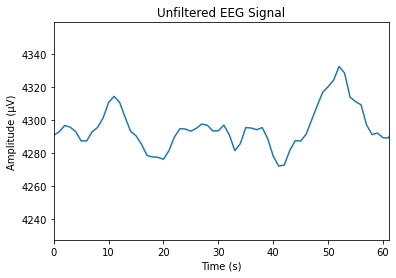

In [11]:
import matplotlib.pyplot as plt

# Plot the first channel of the first dataset in df_raw_list
plt.plot(df_raw_list[0].index, df_raw_list[0]['EEG.AF3'])
plt.title('Unfiltered EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (μV)')

# Set the x-axis limits to show only the relevant time period
plt.xlim([0, 61])

plt.show()

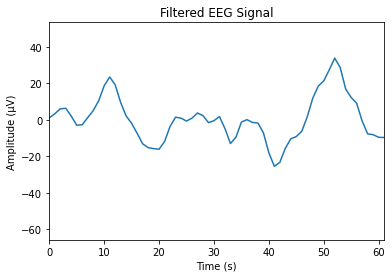

In [12]:
import matplotlib.pyplot as plt

# Plot the first channel of the first dataset in df_list
plt.plot(df_list[0].index, df_list[0]['EEG.AF3'])
plt.title('Filtered EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (μV)')

# Set the x-axis limits to show only the relevant time period
plt.xlim([0, 61])

plt.show()

# Feature Extraction

In [13]:
import pyeeg
import pandas as pd

pfd_list = []

# Iterate through each dataset in the list of dataframes
for df in df_list:
    pfd_values = []
    # Iterate through each row (epoch) in the dataframe
    for i in range(len(df)):
        # Flatten the row data into a 1D array
        epoch_data = df.iloc[i].values.flatten()
        # Compute PFD value for the epoch
        pfd = pyeeg.pfd(epoch_data)
        # Append PFD value to the list of PFD values for this dataset
        pfd_values.append(pfd)
    
    # Create a new dataframe for this dataset, with PFD values as the only column
    pfd_df = pd.DataFrame({'PFD': pfd_values})
    # Append the dataframe to the list of PFD dataframes
    pfd_list.append(pfd_df)

In [14]:
pfd_list[0]

,PFD
0,0.664071
1,0.621175
2,0.647758
3,0.664071
4,0.633610
...,...
7809,0.683192
7810,0.647758
7811,0.647758
7812,0.664071


In [15]:
def labelDatasets(pfd_list):
    #Define a list of users corresponding to their EEG datasets
    user_list = ['Abdullah', 'Andrew', 'Cleo', 'Cris', 'Kevin', 'Malem', 'Rahul', 'Shane', 'Vishwadeep']
    #Map a User label to every EEG dataset
    for i, df in enumerate(pfd_list):
        user = user_list[i]
        df['User'] = user
    
    return pfd_list

pfd_list = labelDatasets(pfd_list)

In [16]:
pfd_list[0]

,PFD,User
0,0.664071,Abdullah
1,0.621175,Abdullah
2,0.647758,Abdullah
3,0.664071,Abdullah
4,0.633610,Abdullah
...,...,...
7809,0.683192,Abdullah
7810,0.647758,Abdullah
7811,0.647758,Abdullah
7812,0.664071,Abdullah
